In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

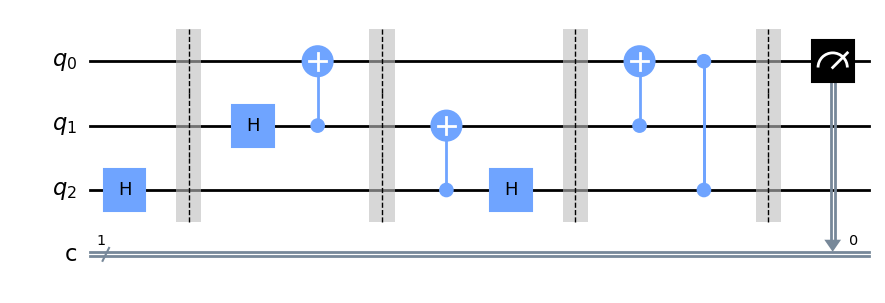

In [2]:
# quantum teleportation circuit using deferred measurement
circuit = QuantumCircuit(3, 1)

# initialize Olivia's qubit (quantum state to teleport)
circuit.h(2)
circuit.barrier()

# create Bell state pair
circuit.h(1)
circuit.cx(1, 0)
circuit.barrier()

# Olivia performs Bell state measurement
circuit.cx(2, 1)
circuit.h(2)
circuit.barrier()

# apply conditional operations on Barron's qubit
circuit.cx(1, 0)
circuit.cz(2, 0)
circuit.barrier()

# measure Barron's destination qubit
circuit.measure(0, 0)

circuit.draw(output='mpl')

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.tools.monitor import job_monitor
IBMQ.save_account('<INSERT YOUR IBM QUANTUM API KEY>')
provider = IBMQ.load_account()

configrc.store_credentials:WARNING:2022-11-08 05:38:07,849: Credentials already present. Set overwrite=True to overwrite.


In [4]:
qcomp = provider.get_backend('ibmq_qasm_simulator')
job = execute(circuit, backend=qcomp)
job_monitor(job)

Job Status: job has successfully run


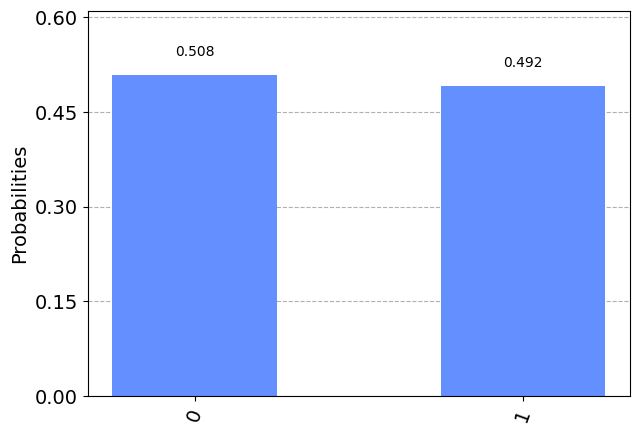

In [5]:
qcomp_result = job.result()
plot_histogram(qcomp_result.get_counts())